<a href="https://colab.research.google.com/github/RedSummit1/YAML/blob/master/evan_personal_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CTP_data/FRAUD/Fraud.csv')

In [ ]:
#df.head(5)
df_new = df.sample(n=600000, random_state=0)

In [ ]:
df_new.to_csv("/content/drive/MyDrive/CTP_data/FRAUD/baby_fraud.csv", index=False)

In [ ]:
df.columns

Index(['step', 'type', 'nameOrig', 'newbalanceOrig', 'nameDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
any(df.duplicated())

False

# Multicollinearity

<Axes: >

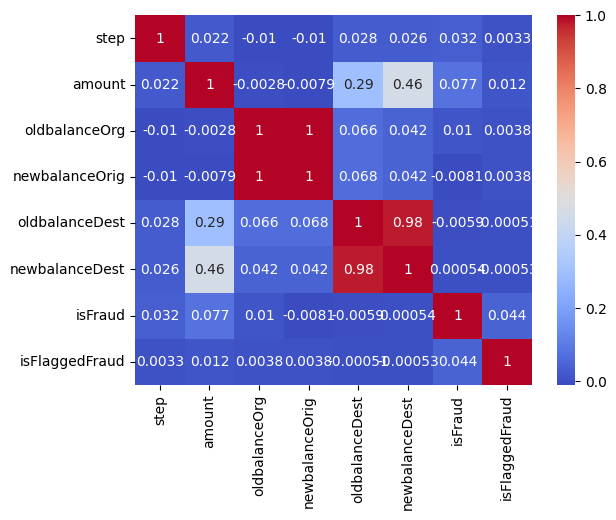

In [ ]:
col = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']

corr_matrix = df[col].corr()

sns.heatmap(data=corr_matrix, annot=True,cmap='coolwarm')

#Old/New Balance data correlates to much with other each other, multicollinearilty. We will remove old balance data

In [ ]:
#One option to combat multicollinearity is to get rid of one of the columns
#Keep new balance since it can tells us more, for example: if the new balance is 0 that means the transaction was potentially fraudulent
df.drop(columns=['oldbalanceDest','oldbalanceOrg'], inplace=True)

col = ['step','amount','newbalanceOrig','newbalanceDest','isFraud','isFlaggedFraud']

corr_matrix = df[col].corr()

sns.heatmap(data=corr_matrix, annot=True,cmap='coolwarm')

In [ ]:
df.columns

# Visualizations

All fraudulent transactions that occur are only TRANSFER and CASH OUT transaction types

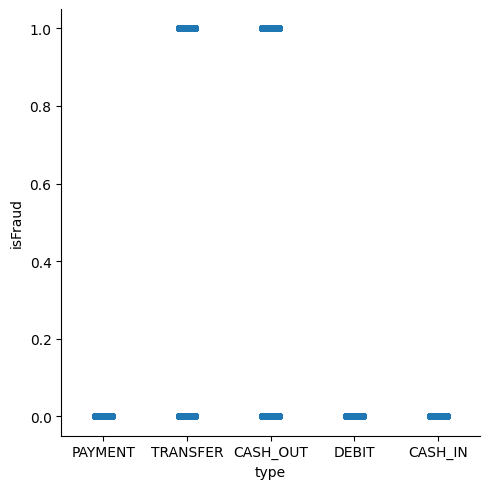

In [ ]:
sns.catplot(data=df, x="type",y="isFraud")

See if there are any outliers

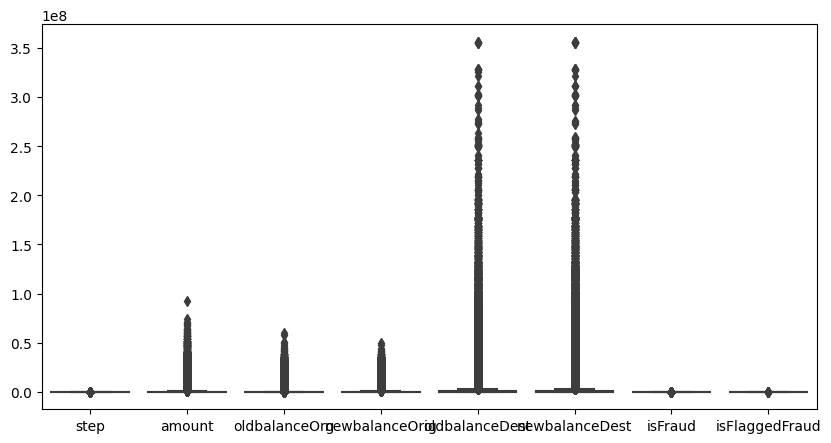

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [ ]:
sns.countplot(data=df, x='type')
plt.xlabel('Transaction types')
plt.ylabel('Number of Occurences (millions)')

In [ ]:
sns.barplot(data=df,x='type',y='amount')
plt.xlabel('Transaction type')
plt.ylabel('Transaction amount')

In [ ]:
sns.scatterplot(data=df, x='amount',y='step', hue='isFraud')
plt.xlabel('Step')
plt.ylabel('Amount')

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Per change

In [ ]:
df["per_change"] = ((df["newbalanceOrig"] - df["oldbalanceOrg"])/(df["oldbalanceOrg"]))
df["per_change"] = pd.Series(np.where(df["oldbalanceOrg"] == 0.0,0,df["per_change"]))

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,per_change
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.057834
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.087735
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-1.000000
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-1.000000
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.280795


<Axes: >

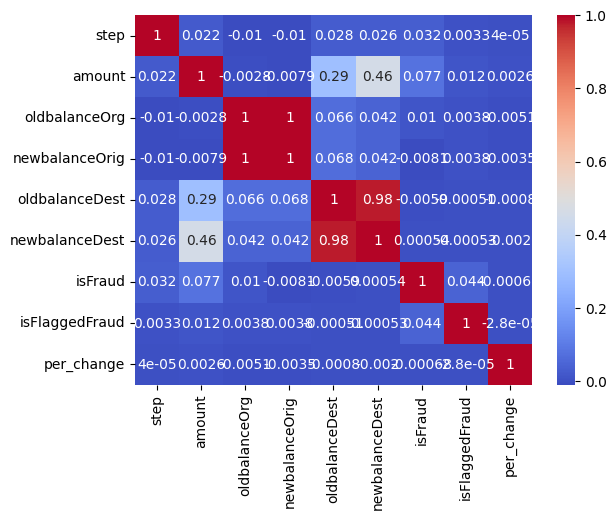

In [ ]:
col = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud', 'per_change']

corr_matrix = df[col].corr()

sns.heatmap(data=corr_matrix, annot=True,cmap='coolwarm')

# Feature Selection

In [ ]:
#drop these features
#'newbalanceOrig', 'newbalanceDest' amount'
df.drop(columns=['isFlaggedFraud','oldbalanceOrg','oldbalanceDest'], axis=1, inplace=True)

In [ ]:
df.head(5)

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,per_change
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,-0.057834
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,-0.087735
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,-1.000000
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,-1.000000
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,-0.280795


In [ ]:
df_new = df


In [ ]:
#one hot encode transaction types
df_new = pd.get_dummies(df, columns=['type'], prefix=['type'])
df_new.drop(columns=['nameOrig','nameDest'],axis=1, inplace=True)


In [ ]:
df_new.head(5)


,step,amount,newbalanceOrig,newbalanceDest,isFraud,per_change,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.0,0,-0.057834,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,-0.087735,0,0,0,1,0
2,1,181.00,0.00,0.0,1,-1.000000,0,0,0,0,1
3,1,181.00,0.00,0.0,1,-1.000000,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,-0.280795,0,0,0,1,0


In [ ]:
df_new.drop(columns=['step'],axis=1, inplace=True)


In [ ]:
df_new.drop(columns=['type_PAYMENT','type_CASH_IN'],axis=1, inplace=True)

In [ ]:
df_new.head(5)

,newbalanceOrig,newbalanceDest,isFraud,per_change,type_CASH_OUT,type_DEBIT,type_TRANSFER
0,160296.36,0.0,0,-0.057834,0,0,0
1,19384.72,0.0,0,-0.087735,0,0,0
2,0.00,0.0,1,-1.000000,0,0,1
3,0.00,0.0,1,-1.000000,1,0,0
4,29885.86,0.0,0,-0.280795,0,0,0


# Outliers

In [ ]:
numeric_columns = df_new.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df_new)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: per_change, Percentage of outliers: 6.95%


In [ ]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range



In [ ]:
low_leadtime,high_leadtime=remove_outlier(df_new['newbalanceOrig'])
df_new['newbalanceOrig']=np.where(df_new['newbalanceOrig']>high_leadtime,high_leadtime,df_new['newbalanceOrig'])
df_new['newbalanceOrig']=np.where(df_new['newbalanceOrig']<low_leadtime,low_leadtime,df_new['newbalanceOrig'])

low_leadtime,high_leadtime=remove_outlier(df_new['newbalanceDest'])
df_new['newbalanceDest']=np.where(df_new['newbalanceDest']>high_leadtime,high_leadtime,df_new['newbalanceDest'])
df_new['newbalanceDest']=np.where(df_new['newbalanceDest']<low_leadtime,low_leadtime,df_new['newbalanceDest'])


In [ ]:
# Removing outliers from the 'per_change' column
low_threshold, high_threshold = remove_outlier(df_new['per_change'])

# Capping the values at the high threshold
df_new['per_change'] = np.where(df_new['per_change'] > high_threshold, high_threshold, df_new['per_change'])

# Raising the values at the low threshold
df_new['per_change'] = np.where(df_new['per_change'] < low_threshold, low_threshold, df_new['per_change'])


In [ ]:
# Removing outliers from the 'step' column
low_threshold, high_threshold = remove_outlier(df_new['step'])

# Capping the values at the high threshold for 'step'
df_new['step'] = np.where(df_new['step'] > high_threshold, high_threshold, df_new['step'])

# Raising the values at the low threshold for 'step'
df_new['step'] = np.where(df_new['step'] < low_threshold, low_threshold, df_new['step'])


In [ ]:
# Removing outliers from the 'step' column
low_threshold, high_threshold = remove_outlier(df_new['amount'])

# Capping the values at the high threshold for 'step'
df_new['amount'] = np.where(df_new['amount'] > high_threshold, high_threshold, df_new['amount'])

# Raising the values at the low threshold for 'step'
df_new['amount'] = np.where(df_new['amount'] < low_threshold, low_threshold, df_new['amount'])

In [ ]:
df_new.shape

(600000, 7)

([<matplotlib.patches.Wedge at 0x7c189bedf820>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87'),
  Text(0.599995066874818, -0.002433048680711153, '0.13')])

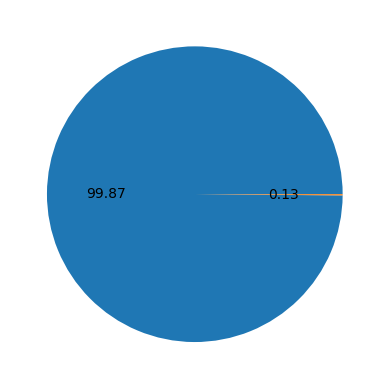

In [ ]:
#percentage of fraudulent transactions is highly is balanced
plt.pie(df_new['isFraud'].value_counts(), autopct='%.2f')

# Smoting/Model Building


SMOTING


In [ ]:
x = df_new.drop('isFraud', axis=1)
y = df_new['isFraud']

smote = SMOTE(sampling_strategy='auto', random_state=42)
x,y = smote.fit_resample(x,y)


In [ ]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=142)

In [ ]:
sc=StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

In [ ]:
lgr = LogisticRegression(max_iter=500)
lgr.fit(xtrain_sc, ytrain)

LogisticRegression(max_iter=500)

In [ ]:
ypred_test_lgr=lgr.predict(xtest_sc)

In [ ]:

def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(class_rep)

acc_report(ytest,ypred_test_lgr)

the accuracy of tha model is  0.9006654907900153
              precision    recall  f1-score   support

           0       0.97      0.83      0.89   1589193
           1       0.85      0.97      0.91   1588011

    accuracy                           0.90   3177204
   macro avg       0.91      0.90      0.90   3177204
weighted avg       0.91      0.90      0.90   3177204



In [ ]:
from sklearn.metrics import confusion_matrix

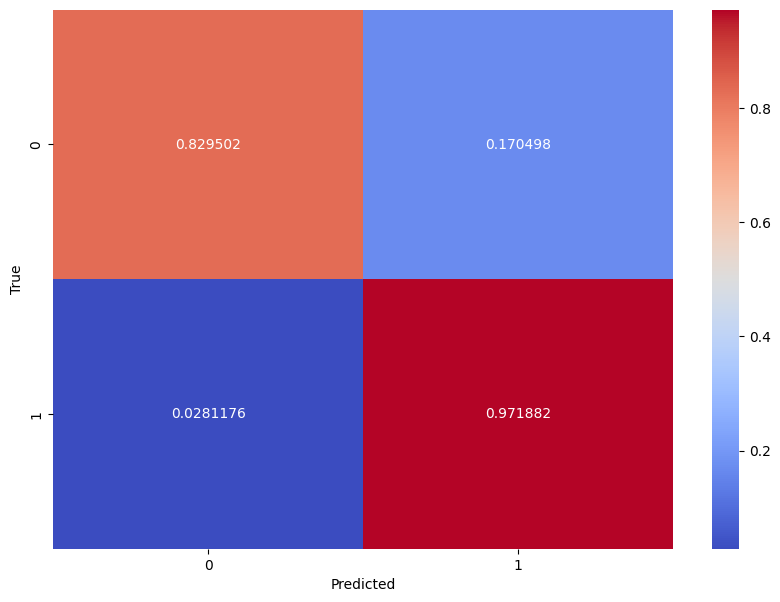

In [ ]:
# Plot the confusion matrix
cm_normalized = confusion_matrix(ytest, ypred_test_lgr, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

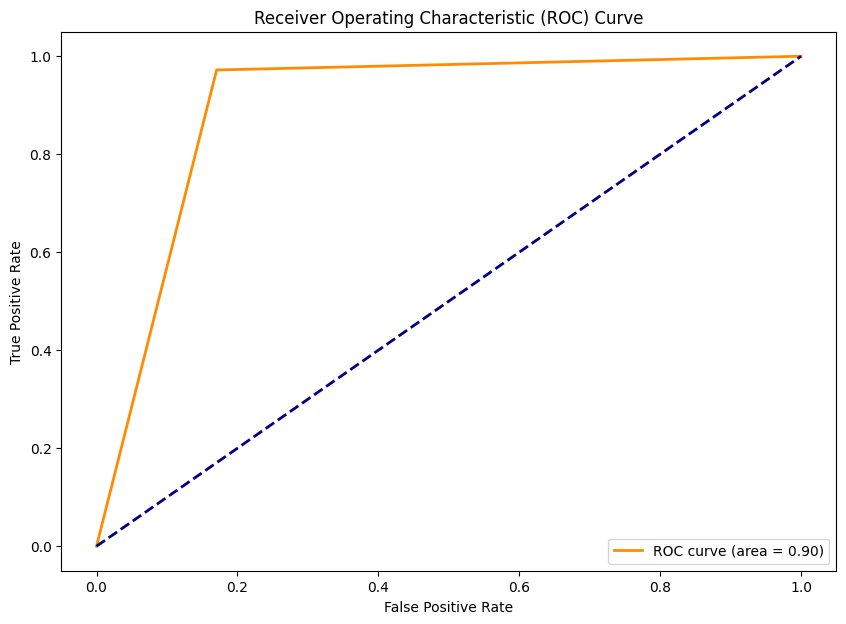

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming ytest and ypred_test_lgr are already defined and are the true labels and model's probabilities
# Normally, ypred_test_lgr should be the probability estimates of the positive class, not the predicted labels.
# If ypred_test_lgr is indeed the predicted labels, you need to modify the model output to be probabilities.

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, ypred_test_lgr)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

# Save the model
with open('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/evan_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lgr, file)

In [ ]:
# Load the model
with open('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/evan_logistic_regression_model.pkl', 'rb') as file:
    lgr = pickle.load(file)


# RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df_new = df_new.sample(n=600000, random_state=0)

df_new.head(5)
X = df_new.drop('isFraud', axis=1)
y = df_new['isFraud']

# Applying SMOTE for handling class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Creating the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model with the scaled data
rf_classifier.fit(X_train_sc, y_train)

# Predicting the Test set results with the scaled data
y_pred = rf_classifier.predict(X_test_sc)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))



# Plot the confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming ytest and ypred_test_lgr are already defined and are the true labels and model's probabilities
# Normally, ypred_test_lgr should be the probability estimates of the positive class, not the predicted labels.
# If ypred_test_lgr is indeed the predicted labels, you need to modify the model output to be probabilities.

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    120073
           1       0.99      1.00      0.99    119617

    accuracy                           0.99    239690
   macro avg       0.99      0.99      0.99    239690
weighted avg       0.99      0.99      0.99    239690



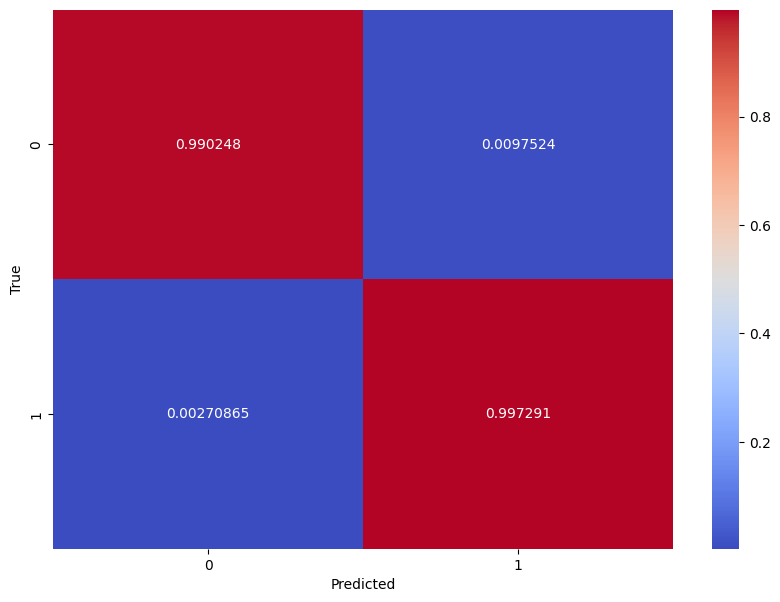

In [ ]:
# Plot the confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

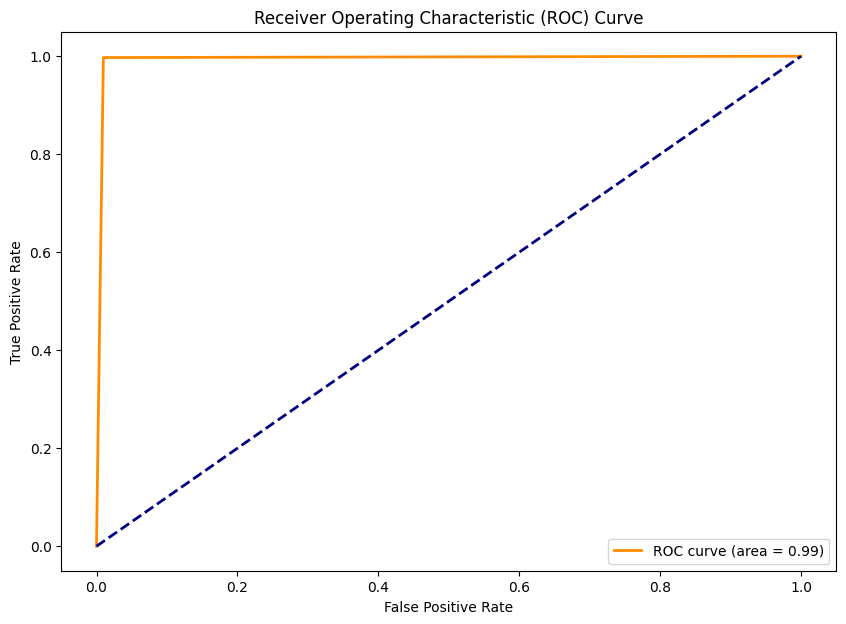

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming ytest and ypred_test_lgr are already defined and are the true labels and model's probabilities
# Normally, ypred_test_lgr should be the probability estimates of the positive class, not the predicted labels.
# If ypred_test_lgr is indeed the predicted labels, you need to modify the model output to be probabilities.

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compare models

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 16.2 

In [ ]:
from pycaret.classification import *

In [ ]:
dupes = df_new.sample(n=600000, random_state=0)
dupes.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4644207,330,607193.64,16065842.92,2787344.06,0,1,0,0,0,0
3800666,281,3473.75,0.00,0.00,0,0,0,0,1,0
4426240,322,66170.69,0.00,66170.69,0,0,1,0,0,0
5788765,401,335384.26,0.00,5647342.87,0,0,0,0,0,1
2010701,180,234392.25,255274.25,0.00,0,1,0,0,0,0


In [ ]:
train,test = train_test_split(dupes , test_size = 0.2, random_state=42 )

In [ ]:
setup_data = setup(data = train ,target = 'isFraud',session_id=42 ,remove_outliers = True, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(480000, 10)"
4,Transformed data shape,"(463200, 10)"
5,Transformed train set shape,"(319200, 10)"
6,Transformed test set shape,"(144000, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models = compare_models(n_select=3)
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9994,0.9781,0.5728,0.9156,0.7014,0.7012,0.7221,17.4250
catboost,CatBoost Classifier,0.9994,0.9783,0.5890,0.8821,0.7040,0.7037,0.7193,86.8370
et,Extra Trees Classifier,0.9993,0.9088,0.5068,0.9088,0.6478,0.6475,0.6767,24.3360
ridge,Ridge Classifier,0.9987,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.9560
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,15.3270
lr,Logistic Regression,0.9986,0.6651,0.0344,0.0610,0.0437,0.0436,0.0455,16.3890
knn,K Neighbors Classifier,0.9977,0.6893,0.2487,0.2613,0.2264,0.2253,0.2382,18.0290
gbc,Gradient Boosting Classifier,0.9959,0.6164,0.3462,0.3869,0.2468,0.2456,0.2958,61.5160
rf,Random Forest Classifier,0.9954,0.8983,0.6529,0.3447,0.3771,0.3758,0.4271,48.9050
dt,Decision Tree Classifier,0.9947,0.8013,0.6073,0.2896,0.3179,0.3165,0.3708,17.0810


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='binary:logistic', ...),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
       

#Neural Network


In [ ]:
pd.set_option('display.max_rows', None)
import numpy  as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#df_new = df_new.sample(n=600000, random_state=0)
df_new.head(5)

,step,amount,newbalanceOrig,newbalanceDest,isFraud,per_change,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1.0,9839.64,160296.36,0.0,0,-0.057834,0,0,0,1,0
1,1.0,1864.28,19384.72,0.0,0,-0.087735,0,0,0,1,0
2,1.0,181.00,0.00,0.0,1,-1.000000,0,0,0,0,1
3,1.0,181.00,0.00,0.0,1,-1.000000,0,1,0,0,0
4,1.0,11668.14,29885.86,0.0,0,-0.280795,0,0,0,1,0


In [ ]:
x = df_new.drop('isFraud', axis=1)
y = df_new['isFraud']

smote = SMOTE(sampling_strategy='auto', random_state=42)
x,y = smote.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#turns 25%e of the training data into validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Normalizes x data

scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Parameters

#//////////////////////
learning_rate = 0.01
epochs = 200
batch_size = 64
#/////////////////////


In [ ]:
'''
model = keras.Sequential(
    [
        keras.layers.Dense(units=5, activation="relu", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.1),

        #hidden layers
        keras.layers.Dense(units=10, activation="relu"),

        keras.layers.Dense(units=30, activation="relu"),
        keras.layers.Dropout(0.1),

        keras.layers.Dense(units=3, activation="relu"),

        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)


# Summary of the model
model.summary()
'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU

model = Sequential([
    Dense(units=10, input_shape=(X_train.shape[-1],)),

    LeakyReLU(alpha=0.01),  # LeakyReLU after the first Dense layer

    Dense(units=30),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the second Dense layer

    Dense(units=300),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the third Dense layer

    Dropout(0.1),  # Dropout layer remains the same

    Dense(units=30),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the fourth Dense layer

    Dense(units=3),
    LeakyReLU(alpha=0.01),  # LeakyReLU after the fourth Dense layer

    Dense(units=1, activation='sigmoid')  # Output layer remains the same
])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 300)               9300      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model with an optimizer
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


# Define the learning rate reduction callback
lr_reduction = ReduceLROnPlateau(
    monitor="val_loss",  # metric to monitor
    factor=0.1,  # factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,  # number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,  # lower bound on the learning rate
    verbose=1,  # verbosity mode
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

Notes
* archiecture was to compliated, reduced layers
* epochs and batch size were big, reduced them
* auc/val_loss plautea past 30
* added early stopping

In [ ]:
history = model.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_val, y_val),
          verbose=1,
          callbacks=[early_stopping, lr_reduction])

Epoch 1/200
11236/11236 [==============================] - 75s 6ms/step - loss: 0.1290 - accuracy: 0.9372 - val_loss: 0.1147 - val_accuracy: 0.9423 - lr: 0.0100
Epoch 2/200
11236/11236 [==============================] - 60s 5ms/step - loss: 0.1176 - accuracy: 0.9408 - val_loss: 0.1129 - val_accuracy: 0.9419 - lr: 0.0100
Epoch 3/200
11236/11236 [==============================] - 58s 5ms/step - loss: 0.1138 - accuracy: 0.9429 - val_loss: 0.1118 - val_accuracy: 0.9435 - lr: 0.0100
Epoch 4/200
11236/11236 [==============================] - 60s 5ms/step - loss: 0.1166 - accuracy: 0.9426 - val_loss: 0.1168 - val_accuracy: 0.9402 - lr: 0.0100
Epoch 5/200
11236/11236 [==============================] - 61s 5ms/step - loss: 0.1100 - accuracy: 0.9465 - val_loss: 0.1090 - val_accuracy: 0.9495 - lr: 0.0100
Epoch 6/200
11236/11236 [==============================] - 61s 5ms/step - loss: 0.1132 - accuracy: 0.9451 - val_loss: 0.1076 - val_accuracy: 0.9467 - lr: 0.0100
Epoch 7/200
11236/11236 [=========

In [ ]:
with open('/content/drive/MyDrive/CTP_HW/hist', 'w') as file:
    # Write the content of the variable to the file
    file.write(history)

TypeError: ignored

In [ ]:
final = model.predict(X_test)

7491/7491 [==============================] - 19s 2ms/step


In [ ]:
y_pred = (final > 0.5).astype("int32")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


'''
last run:

Accuracy: 0.9197713713546665
Precision: 0.8674800967928239
Recall: 0.9907901438674716
F1 Score: 0.92504385110115
[ ]


'''

Accuracy: 0.9523926738704159
Precision: 0.9463558917066258
Recall: 0.9590858612426209
F1 Score: 0.9526783529694738


'\nlast run:\n\nAccuracy: 0.9197713713546665\nPrecision: 0.8674800967928239\nRecall: 0.9907901438674716\nF1 Score: 0.92504385110115\n[ ]\n\n\n'

In [ ]:
model.save('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/evan_200_64_9_features.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/evan_200_64_9_features.h5')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Optional for a nicer-looking matrix
from tensorflow.keras.models import load_model

# Assuming you have your test data ready: X_test, y_test



# Make predictions
# For binary classification, use model.predict_classes(X_test) or (model.predict(X_test) > 0.5).astype("int32")
# For multi-class classification, use np.argmax(model.predict(X_test), axis=-1)
#predictions = (loaded_model.predict(X_test) > 0.5).astype("int32")

# Generate the confusion matrix
#cm = confusion_matrix(y_test, y_pred)



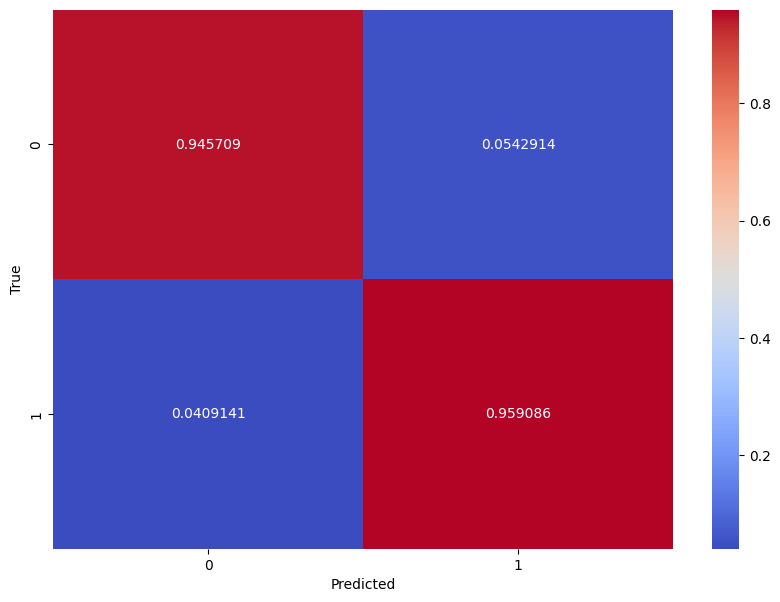

In [ ]:
# Plot the confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Streamlit

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import tensorflow as tf

def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    """
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc_curve(fpr, tpr, roc_auc):
    """
    This function plots the ROC curve
    """
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

st.title('Neural Network Model Performance Dashboard')

# Correct way to load the model
model_path = '/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/evan_100_512_005.h5'
nn_model = tf.keras.models.load_model(model_path)

# Load and preprocess the data
data_path = '/content/drive/MyDrive/CTP_data/FRAUD/Fraud.csv'
data = pd.read_csv(data_path)

# Apply the preprocessing steps

data["per_change"] = ((data["newbalanceOrig"] - data["oldbalanceOrg"])/(data["oldbalanceOrg"]))
data["per_change"] = pd.Series(np.where(data["oldbalanceOrg"] == 0.0,0,data["per_change"]))

data = data.drop(columns=['isFlaggedFraud', 'oldbalanceOrg', 'oldbalanceDest', 'amount'])
data = pd.get_dummies(data, columns=['type'], prefix=['type'])
data = data.drop(columns=['nameOrig', 'nameDest', 'step', 'type_PAYMENT', 'type_CASH_IN'])

data = data.sample(n=600000, random_state=0)


data.head(5)


# Assuming 'isFraud' is the column with labels
X = data.drop('isFraud', axis=1).astype('float32')
y = data['isFraud']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features (assuming this is the test set and you don't have the original scaler)
X_scaled = scaler.fit_transform(X)


st.write("Data Snapshot:")
st.write(data.head())

# Make predictions
# For binary classification, use model.predict_classes(X_test) or (model.predict(X_test) > 0.5).astype("int32")
# For multi-class classification, use np.argmax(model.predict(X_test), axis=-1)
predictions = (nn_model.predict(X_scaled) > 0.5).astype("int32")
predicted_probabilities = nn_model.predict(X_scaled)  # Get predicted probabilities for ROC curve

# Generate the confusion matrix
nn_cm = confusion_matrix(y, predictions)

#ROC
nn_fpr, nn_tpr, _ = roc_curve(y, predicted_probabilities)
nn_roc_auc = auc(nn_fpr, nn_tpr)


plt.figure(figsize=(10, 7))
sns.heatmap(nn_cm, annot=True, fmt='g', cmap='coolwarm')  # 'g' format makes sure integers are displayed properly
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



KeyboardInterrupt: ignored

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

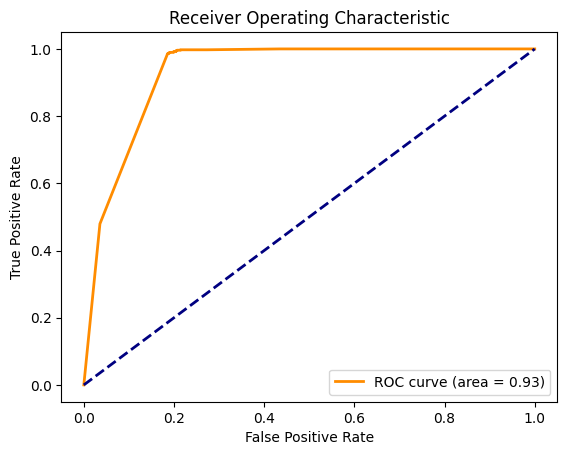

DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    """
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc_curve(fpr, tpr, roc_auc):
    """
    This function plots the ROC curve
    """
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

st.title('Logistic Regression Model Performance Dashboard')

# Load the model
with open('/content/drive/MyDrive/CTP_FRAUD_STORAGE/models/evan_logistic_regression_model.pkl', 'rb') as file:
    lgr = pickle.load(file)

# Load and preprocess the data
data_path = '/content/drive/MyDrive/CTP_data/FRAUD/Fraud.csv'
data = pd.read_csv(data_path)

# Apply the preprocessing steps as before
# ...

data["per_change"] = ((data["newbalanceOrig"] - data["oldbalanceOrg"])/(data["oldbalanceOrg"]))
data["per_change"] = pd.Series(np.where(data["oldbalanceOrg"] == 0.0,0,data["per_change"]))

data = data.drop(columns=['isFlaggedFraud', 'oldbalanceOrg', 'oldbalanceDest','newbalanceOrig', 'newbalanceDest', 'amount'])
data = pd.get_dummies(data, columns=['type'], prefix=['type'])
data = data.drop(columns=['nameOrig', 'nameDest', 'step', 'type_PAYMENT', 'type_CASH_IN'])

data = data.sample(n=600000, random_state=0)


data.head(5)


# Ensure all columns are of type float32
X_test = data.drop('isFraud', axis=1).astype('float32')
y_test = data['isFraud']

st.write("Data Snapshot:")
st.write(data.head())

# Make predictions
predictions = lgr.predict(X_test)
probabilities = lgr.predict_proba(X_test)[:, 1]

# Generate the confusion matrix
lgr_cm = confusion_matrix(y_test, predictions)

# Calculate ROC curve and AUC
lgr_fpr, lgr_tpr, _ = roc_curve(y_test, probabilities)
lgr_roc_auc = auc(lgr_fpr, lgr_tpr)

# Plotting Confusion Matrix
st.write("Confusion Matrix")
plot_confusion_matrix(lgr_cm, classes=np.array([0, 1]))
st.pyplot()

# Plotting ROC Curve
st.write("ROC Curve")
plot_roc_curve(lgr_fpr, lgr_tpr, lgr_roc_auc)
st.pyplot()
